In [ ]:
!kaggle competitions download -c competitive-data-science-final-project

  0% 0.00/14.3M [00:00<?, ?B/s]
100% 14.3M/14.3M [00:00<00:00, 1.77GB/s]


In [ ]:
!unzip competitive-data-science-final-project.zip
!rm competitive-data-science-final-project.zip

Archive:  competitive-data-science-final-project.zip
  inflating: item_categories.csv     
  inflating: item_cats.csv           
  inflating: items.csv               
  inflating: sales_train.csv.gz      
  inflating: sample_submission.csv.gz  
  inflating: shops.csv               
  inflating: test.csv.gz             


In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
transactions    = pd.read_csv('sales_train.csv.gz')
items           = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops           = pd.read_csv('shops.csv')

In [24]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [25]:
items.shape

(22170, 3)

In [26]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [27]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [28]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [29]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [30]:
print(f"Shape of items: {items.shape}\n")
print(f"Shape of shops: {shops.shape}\n")
print(f"Shape of item_categories: {item_categories.shape}\n")
print(f"Shape of transactions: {transactions.shape}")


Shape of items: (22170, 3)

Shape of shops: (60, 2)

Shape of item_categories: (84, 2)

Shape of transactions: (2935849, 6)


In [35]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [45]:
df = transactions.copy()
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
display(df.head())


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [46]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [50]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013


In [55]:
tmp = df[df.item_cnt_day < 0]
tmp.item_cnt_day.unique()

array([ -1.,  -5.,  -6.,  -3.,  -2.,  -4., -22., -16.,  -9.])

###1. What was the maximum total revenue among all the shops in September, 2014?

In [56]:
df['revenue'] = df['item_price'] * df['item_cnt_day']
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,999.00
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,1099.00


In [72]:
revenue_per_shop = df.query('month == 9 and year == 2014').groupby('shop_id')['revenue'].sum()
print(f"Max Revenue: ${revenue_per_shop.max():.3f}")

Max Revenue: $7982852.200


In [73]:
print(f"Shop with the max revenue in September 2014: {revenue_per_shop.idxmax()}")

Shop with the max revenue in September 2014: 31


In [83]:
revenue_per_shop.sort_values(ascending=False)[:1]

,revenue
shop_id,
31,7982852.2


* Here `shop_id` **31** had the highest revenue in September 2014.

In [85]:
df.shape

(2935849, 10)

###2. What item category generated the highest revenue in summer 2014?

**Left Join** the main df with items on `item_id` to get the `item_name` and `item_category_id`.

In [87]:
tmp = df.copy()
tmp = pd.merge(tmp, items, on='item_id', how='left')
tmp.shape

(2935849, 12)

In [88]:
tmp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue,item_name,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,999.00,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,899.00,DEEP PURPLE The House Of Blue Light LP,58
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,-899.00,DEEP PURPLE The House Of Blue Light LP,58
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,1709.05,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,1099.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


Similarly **left join** with `item_categories` to import the category name and id.

In [89]:
tmp = pd.merge(tmp, item_categories, on='item_category_id', how='left')
tmp.shape

(2935849, 13)

In [101]:
tmp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,999.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,899.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,-899.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,1709.05,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,1099.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [104]:
tmp.query('month >= 6 and month <= 8 and year == 2014').groupby('item_category_id')['revenue'].sum().sort_values(ascending=False)

,revenue
item_category_id,
20,32157302.43
12,31385229.70
19,26237112.15
23,19896624.03
30,15876623.34
...,...
82,1629.00
66,730.00
81,599.00


* Here `item_category_id` **20** had highest revenue in Summer 2014.

###3. How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?


In [108]:
const_df = tmp.copy()
item_prices = const_df.groupby('item_id')['item_price'].nunique()
len(item_prices[item_prices == 1])

5926

 * Here **5926** items had constant price during the entire time

###4. What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?


In [121]:
res = tmp.query('month == 12 and year == 2014 and shop_id == 25').groupby('date')['item_cnt_day'].sum()
print(f"Variance of 'shop_id = 25' = {res.var(ddof=1):.3f}")

Variance of 'shop_id = 25' = 117167.702


In [130]:
res.head()

,item_cnt_day
date,
2014-12-01,153.0
2014-12-02,169.0
2014-12-03,195.0
2014-12-04,164.0
2014-12-05,300.0


In [134]:
# Total items sold
int(res.values.sum(axis=0))

12257

In [135]:
# total number of days
len(res)

30

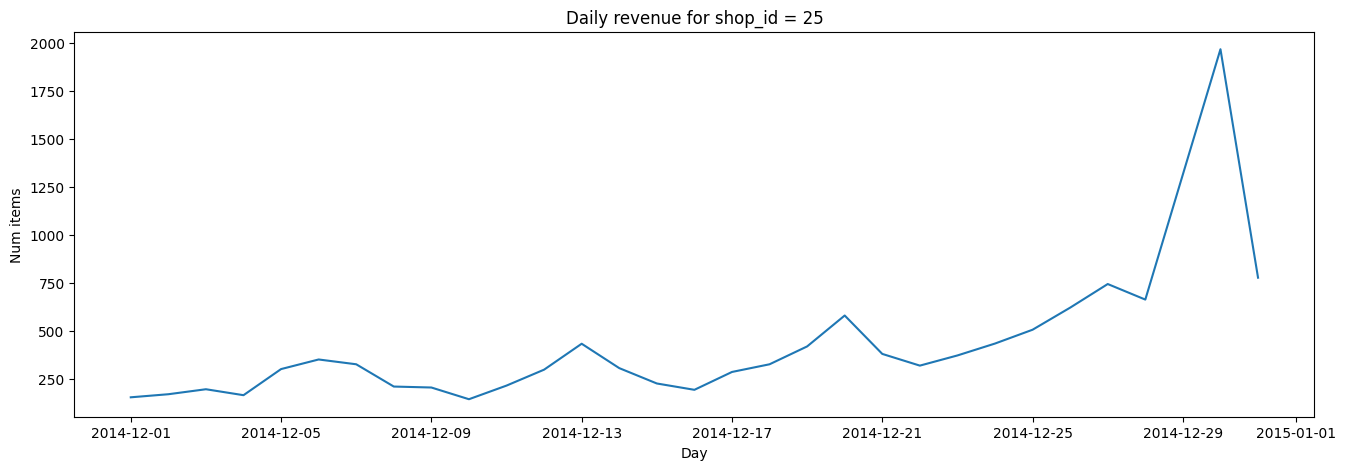

In [141]:
shop_id = 25

total_num_items_sold = 12257
days = 30

# Plot it
plt.figure(figsize=(16, 5))
plt.plot(res.index, res.values)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()